**Vamos experimentar agora o algoritmo Decision Tree?**

In [18]:
!pip -q install yellowbrick

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [20]:
import pickle
with open('/content/sample_data/restaurante.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [21]:
modelo = DecisionTreeClassifier(criterion='entropy')
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')



> **Vamos testar o modelo?**



In [22]:
previsoes = modelo.predict(X_teste)

In [23]:
previsoes

array(['0-10', 'out/30', '>60'], dtype=object)



> **Será se o modelo acertou?**



In [24]:
y_teste

array(['0-10', '30-60', '>60'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.6666666666666666

In [26]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0]])

0.6666666666666666

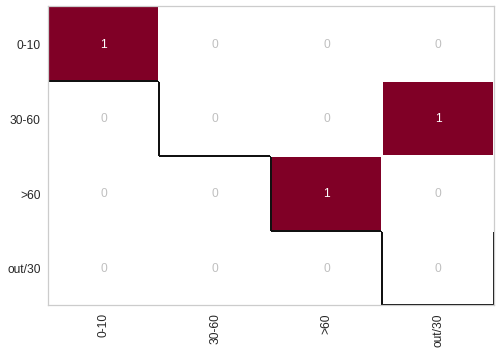

In [27]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [28]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

        0-10       1.00      1.00      1.00         1
       30-60       0.00      0.00      0.00         1
         >60       1.00      1.00      1.00         1
      out/30       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.50      0.50         3
weighted avg       0.67      0.67      0.67         3



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

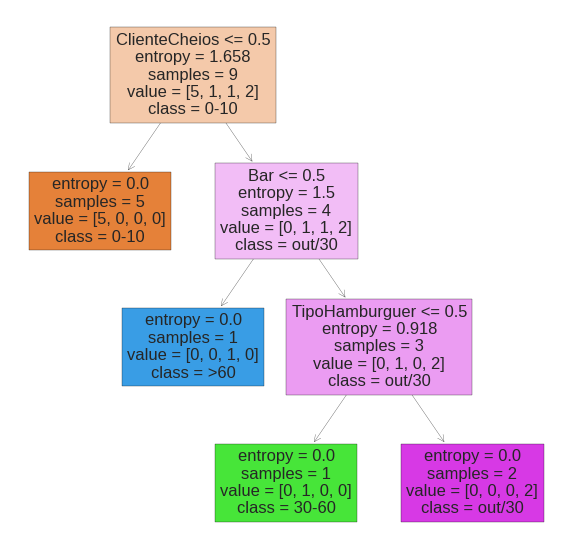

In [31]:
from sklearn import tree
previsores = ['Alternativo', 'Bar', 'ClienteAlguns', 'ClienteCheios', 'ClienteNenhum', 'Chuva', 'fome', 'PreçoR', 'PreçoRR', 'PreçoRRR', 'Res',  'Sex/Sab', 'TipoFrancês', 'TipoTailandês', 'TipoHamburguer', 'TipoItaliano', 'Tempo0-10', 'Tempo30-60', 'TempoOut/30', 'Tempo>60']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(modelo, feature_names=previsores, class_names = modelo.classes_, filled=True);